# **`Customer Clustering by Sum of Price per Customer`**
# **`Comparation by Silhouette Analysis and Elbow Method`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format='retina'

pd.set_option('display.max_colwidth', 0)

print(f'pandas version : {pd.__version__}')
print(f'numpy version : {np.__version__}')
print(f'matplotlib version : {matplotlib.__version__}')
print(f'seaborn version : {sb.__version__}')

pandas version : 1.0.3
numpy version : 1.18.4
matplotlib version : 3.2.1
seaborn version : 0.10.1


## **`Load Data`**

In [2]:
output_path = 'output/'

df = pd.read_csv(f'{output_path}final_allsr_2019.csv',
                 parse_dates=['INV_DATE'],
                 header=0)
df.head()

,SHOWROOM,INV_DATE,INV_NO,ITEM_CODE,ITEM_NAME,QTY,PRICE,CUSTOMER,SR_CODE,INV_TYPE,...,M12,INV_WEEK_DAY,WD0,WD1,WD2,WD3,WD4,WD5,WD6,INV_MONTH_DAY
0,ONLINE,2019-09-23,CS-1256209/057,IG0681,"Callebaut Dark Chocolate Couverture 57.7% , 2.5kg",1.0,850.0,P13820,0,CS,...,0,0,0,0,0,0,0,0,0,23
1,ONLINE,2019-09-23,CS-1256209/057,IG0682,"Callebaut White Chocolate Couverture 28% ,2.5 kg",1.0,950.0,P13820,0,CS,...,0,0,0,0,0,0,0,0,0,23
2,ONLINE,2019-09-23,CS-1256209/057,PK0645,SYN Triangle Paper Gold Card 7x11 cm. (P/100) สามเหลี่ยม,1.0,90.0,P13820,0,CS,...,0,0,0,0,0,0,0,0,0,23
3,ONLINE,2019-09-23,CS-1256209/057,PK0405-8,SNY Round Paper Card 8 cm. P/100,1.0,90.0,P13820,0,CS,...,0,0,0,0,0,0,0,0,0,23
4,ONLINE,2019-09-23,CS-1256209/058,PK0115,CH32 Jelly/Mousse Cups Cap:130ml. dia.98x47x45H,200.0,3.8,R0408,0,CS,...,0,0,0,0,0,0,0,0,0,23


## **`Make Sum of Price and Count from Invoice`**

In [3]:
dfc = df[df['CUSTOMER'] != 'C0161'].groupby('CUSTOMER').agg(PRICE=('PRICE', 'sum'),
                                                            QTY=('QTY', 'sum'),
                                                            COUNT=('INV_NO', 'count'))
dfc.reset_index(inplace=True)
# dfcprice_gt_1e6 = dfc[dfc['PRICE'] > 1e6].sort_values('PRICE', ascending=False)
# dfcqty_gt_5e3 = dfc[dfc['QTY'] > 5e3].sort_values('PRICE', ascending=False)
# dfc.drop(dfc[dfc['PRICE'] > 1e6].index, inplace=True)
# dfc.drop(dfc[dfc['QTY'] > 5e3].index, inplace=True)
dfc

,CUSTOMER,PRICE,QTY,COUNT
0,0088,535.0,1.0,1
1,0245,1391.0,1.0,1
2,1STOPBAKERY,901.0,3.0,2
3,A0005,40345.0,348.0,54
4,A0011,75219.3,333.0,34
...,...,...,...,...
4007,WL01316,330.0,1.0,1
4008,WL01346,2120.0,4.0,4
4009,WP00001,5.5,100.0,2
4010,WP00002,4.2,200.0,2


In [4]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CUSTOMER  4012 non-null   object 
 1   PRICE     4012 non-null   float64
 2   QTY       4012 non-null   float64
 3   COUNT     4012 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 125.5+ KB


# **`Clustering Data`**

In [5]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

## **`1. Scale Data`**

In [6]:
dfc.columns

Index(['CUSTOMER', 'PRICE', 'QTY', 'COUNT'], dtype='object')

In [7]:
cols = ['PRICE', 'QTY', 'COUNT']

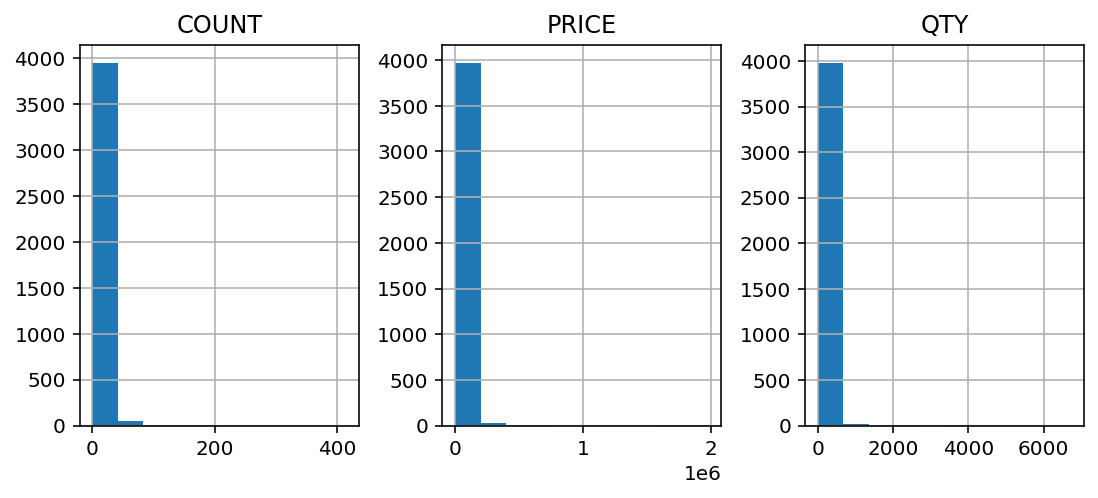

In [8]:
dfc[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5));

In [9]:
## Z-Score
# scaler = preprocessing.StandardScaler() # Create StandardScaler Instance

## Power Transform
scaler = preprocessing.PowerTransformer(standardize=True)

S = scaler.fit_transform(dfc[cols])
S[:5]

array([[-0.89528137, -1.1454226 , -1.04754471],
       [-0.37832542, -1.1454226 , -1.04754471],
       [-0.61329377, -0.08018593, -0.09475182],
       [ 1.44178915,  1.95043506,  1.92966339],
       [ 1.77794368,  1.94604474,  1.84846703]])

In [10]:
X = pd.DataFrame(S, columns=cols)
X

,PRICE,QTY,COUNT
0,-0.895281,-1.145423,-1.047545
1,-0.378325,-1.145423,-1.047545
2,-0.613294,-0.080186,-0.094752
3,1.441789,1.950435,1.929663
4,1.777944,1.946045,1.848467
...,...,...,...
4007,-1.156548,-1.145423,-1.047545
4008,-0.150343,0.182546,0.705664
4009,-3.291174,1.772686,-0.094752
4010,-3.412596,1.886465,-0.094752


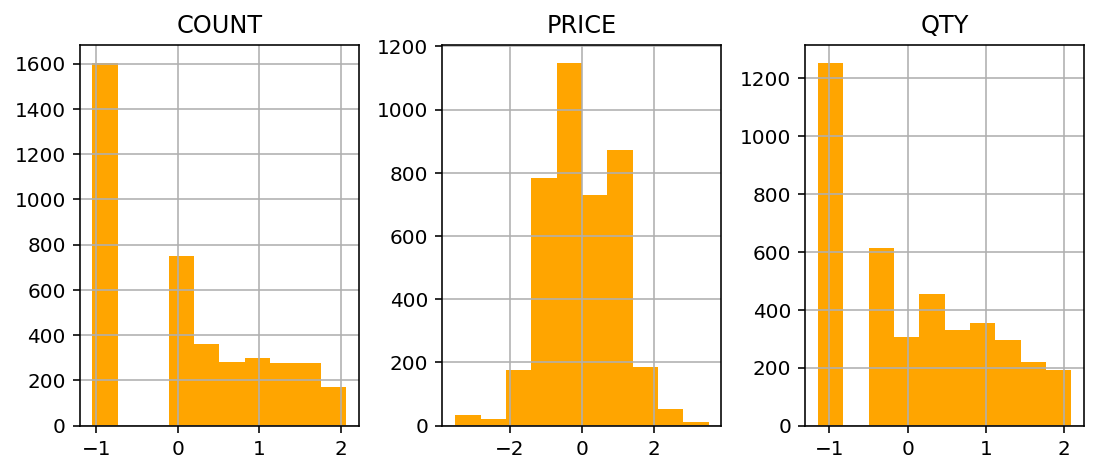

In [11]:
X[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='orange');

## **`2. Silhouette Analysis`**

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [35]:
def sil_score(X, from_k=1, to_k=6):
    '''
    Calculate Silhouette Score for k Cluster
    '''
    sils = []
    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters=k)
        m.fit(X)
        sil_avg = silhouette_score(X, m.labels_).round(4)
        sils.append([sil_avg, k])
    return sils

In [36]:
ss = sil_score(X, 2, 6)
print(f'Score = {ss}')
print(f'Optimal Number of Cluster = {max(ss)[1]}')

Score = [[0.5085, 2], [0.4863, 3], [0.5253, 4], [0.5852, 5], [0.5478, 6]]
Optimal Number of Cluster = 5


## **`Vitualize Silhouette`**

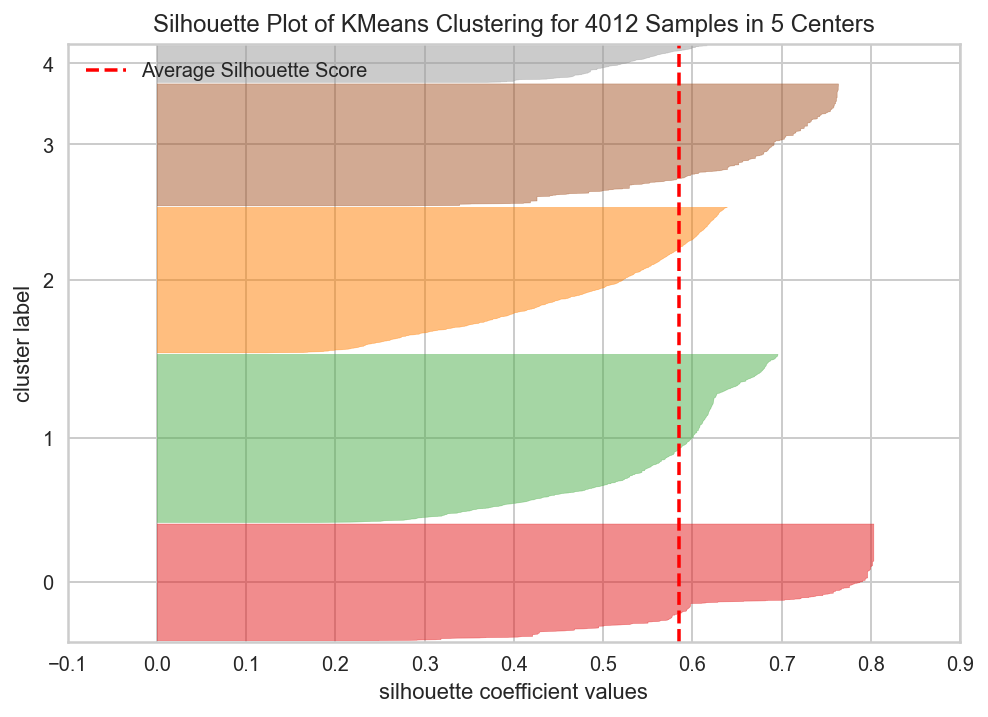

In [38]:
model = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) # Fit training data to Vitualizer
visualizer.poof();

In [39]:
visualizer.silhouette_score_

0.5851696728509306

In [40]:
def sil_plot(X, from_k, to_k):
    sil_scores = []
    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X)
        visualizer.poof()
        sil_scores.append([visualizer.silhouette_score_, k])
    return sil_scores

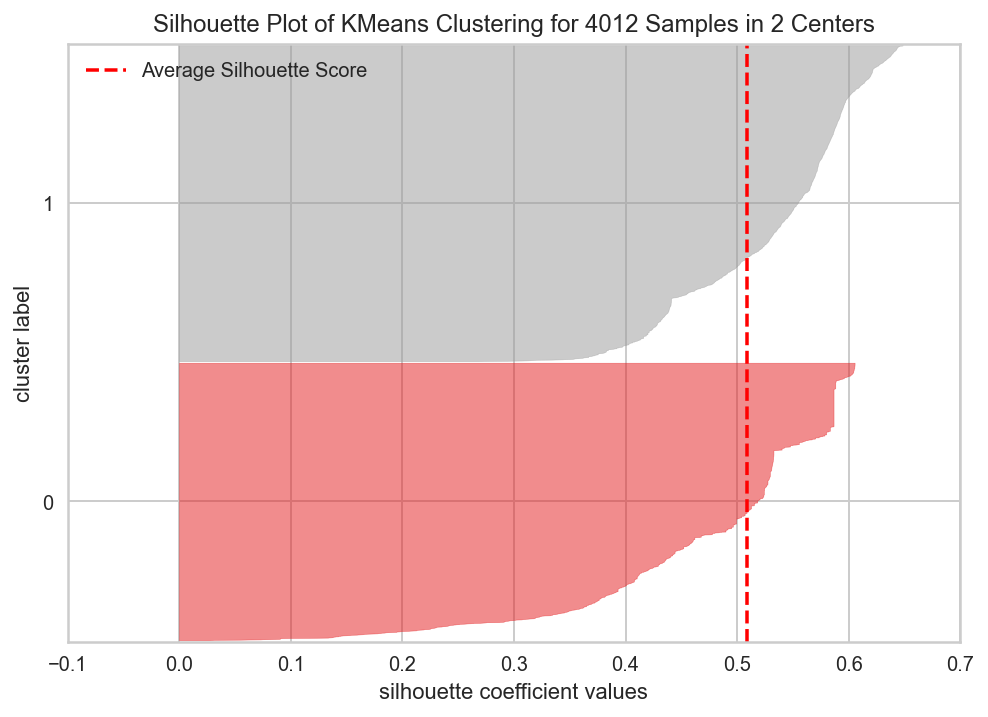

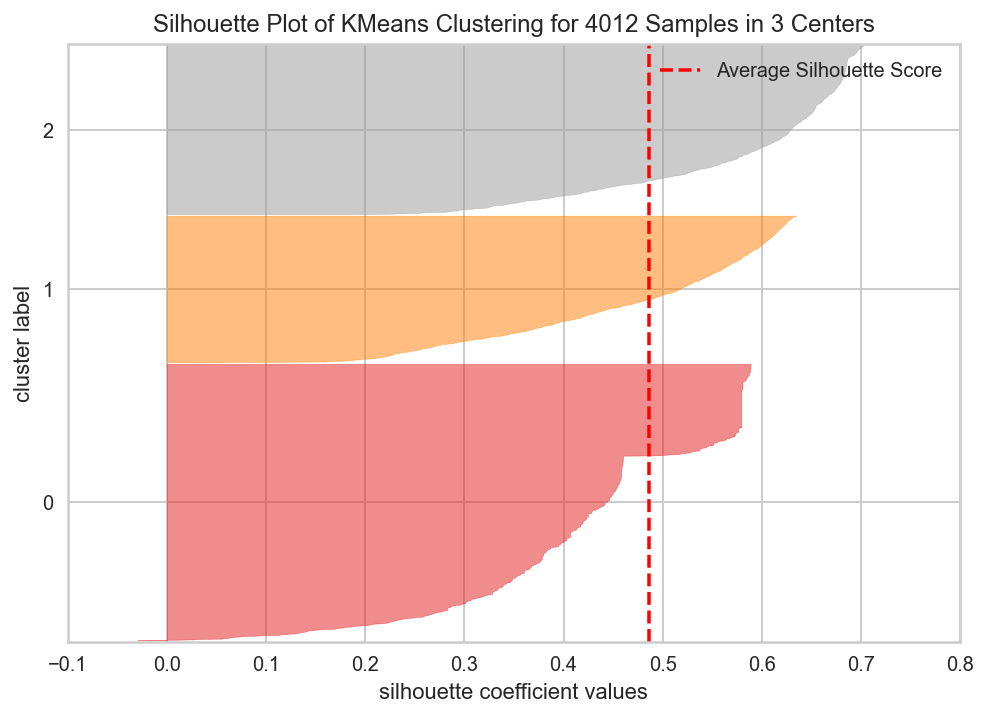

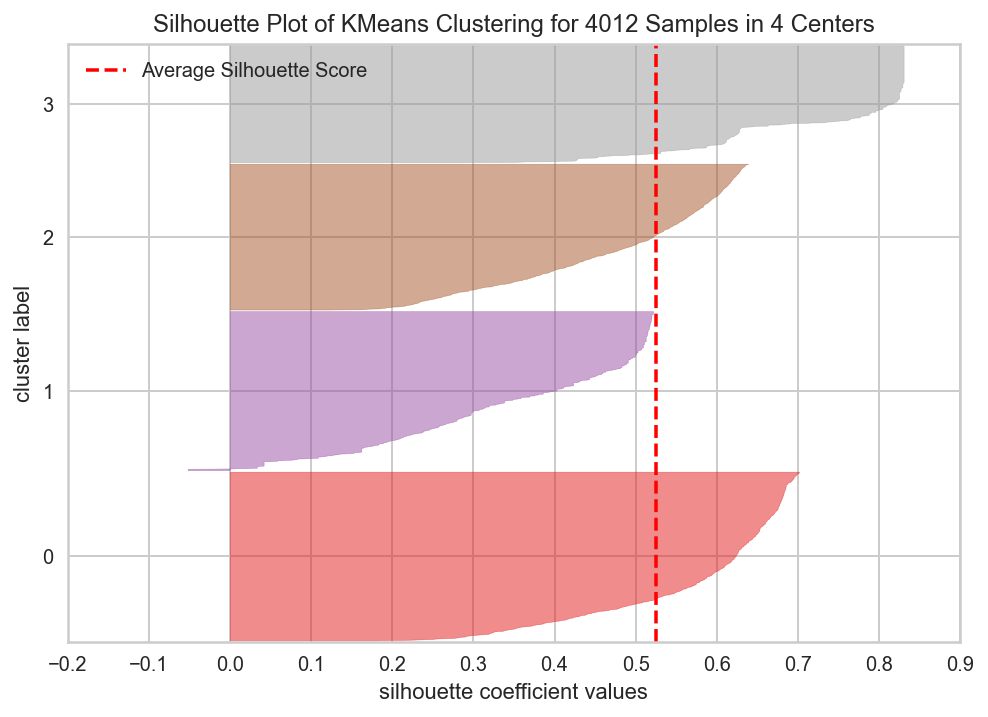

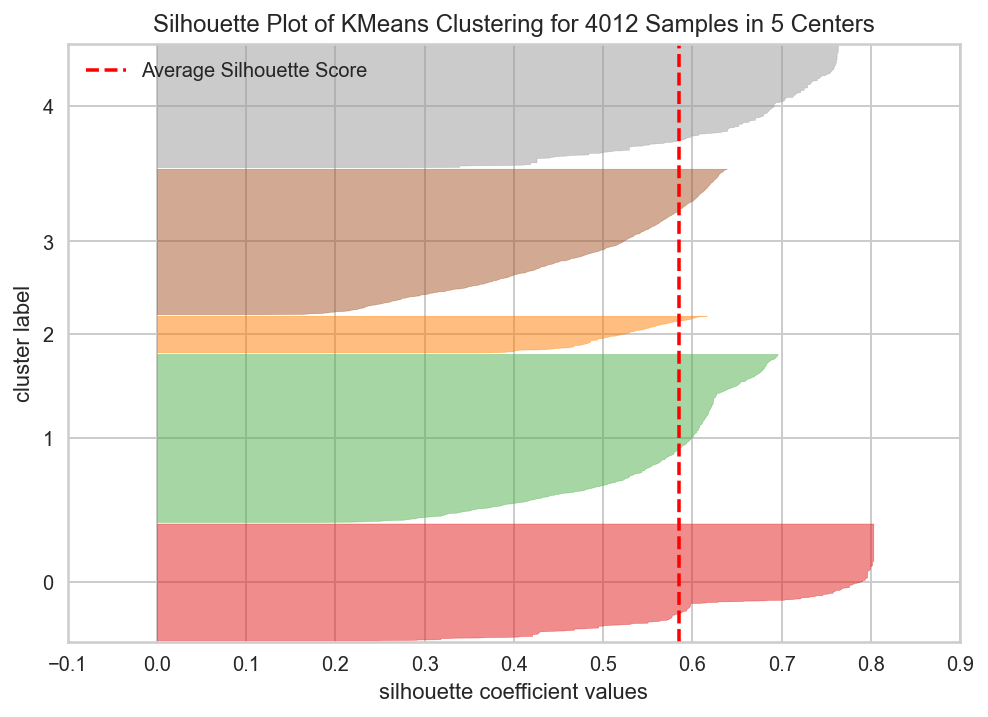

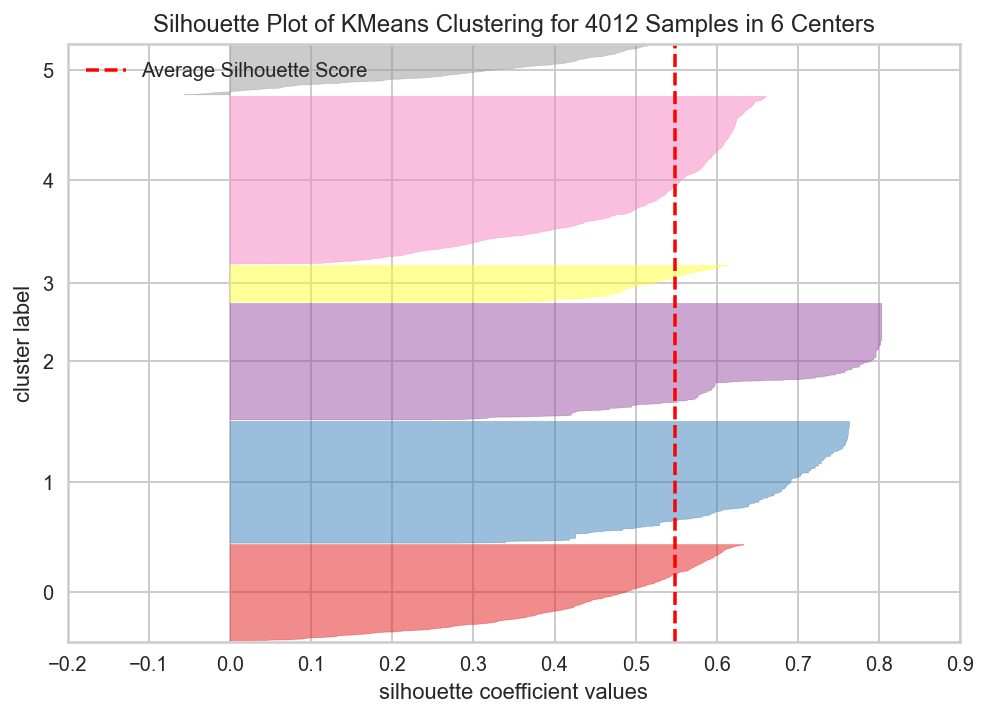

In [41]:
scores = sil_plot(X, 2, 6)

In [19]:
print(scores)

[[0.43575900004505574, 2], [0.4294017442574502, 3], [0.41577186810231126, 4], [0.44904389007756573, 5], [0.4271157608535333, 6]]


In [20]:
max(scores)[1]

5

## **`3. Elbow Method`**

In [42]:
def elbow_plot(X, from_k=2, to_k=5):
    '''
    Plot Elbow Graph for help determining optimal number of clusters
    '''
    ssd = []
    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters=k)
        m.fit(X)
        ssd.append([k, m.inertia_])
    dd = pd.DataFrame(ssd, columns=['k', 'ssd'])
    dd['pct_chg'] = dd['ssd'].pct_change() * 100
    plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
    for i, row in dd.iterrows():
        plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=12)

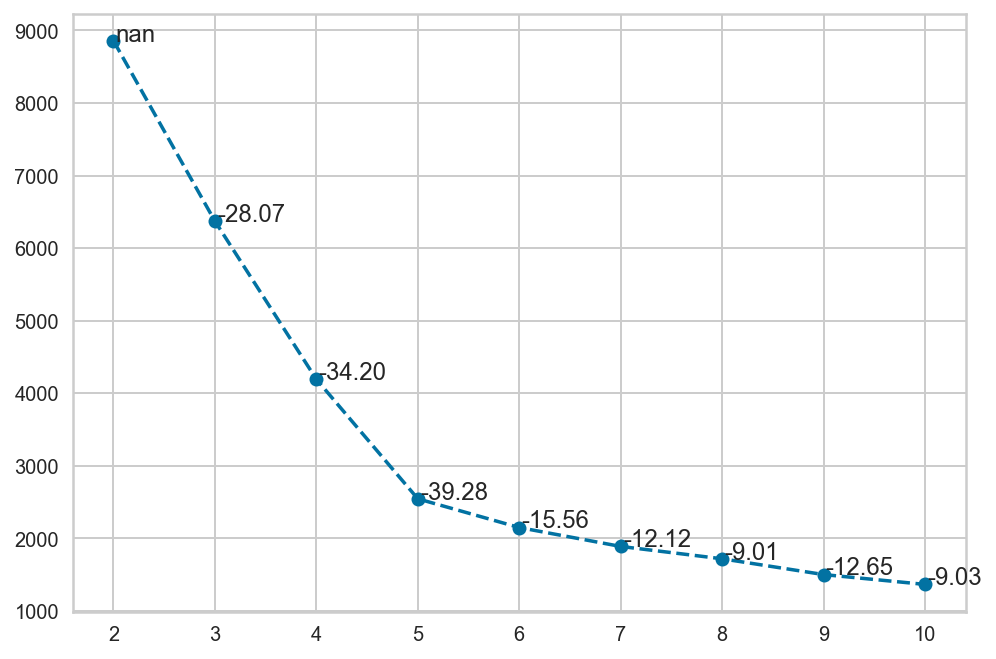

In [43]:
elbow_plot(X, 2, 10)

## **`Compute and Name CLuster`**

In [44]:
model = KMeans(n_clusters=4)

In [45]:
model.fit(X)

KMeans(n_clusters=4)

In [46]:
model.cluster_centers_.round(4)

array([[-0.9944, -0.5128, -0.9277,  2.4625],
       [-0.4055,  0.0929,  0.2834, -0.    ],
       [ 0.6975,  1.2368,  1.3553,  1.    ],
       [ 1.0668, -0.9782, -0.8361,  3.    ]])

In [47]:
dfc['cluster'] = model.labels_
dfc.head()

,CUSTOMER,PRICE,QTY,COUNT,cluster
0,0088,535.0,1.0,1,0
1,0245,1391.0,1.0,1,0
2,1STOPBAKERY,901.0,3.0,2,1
3,A0005,40345.0,348.0,54,2
4,A0011,75219.3,333.0,34,2


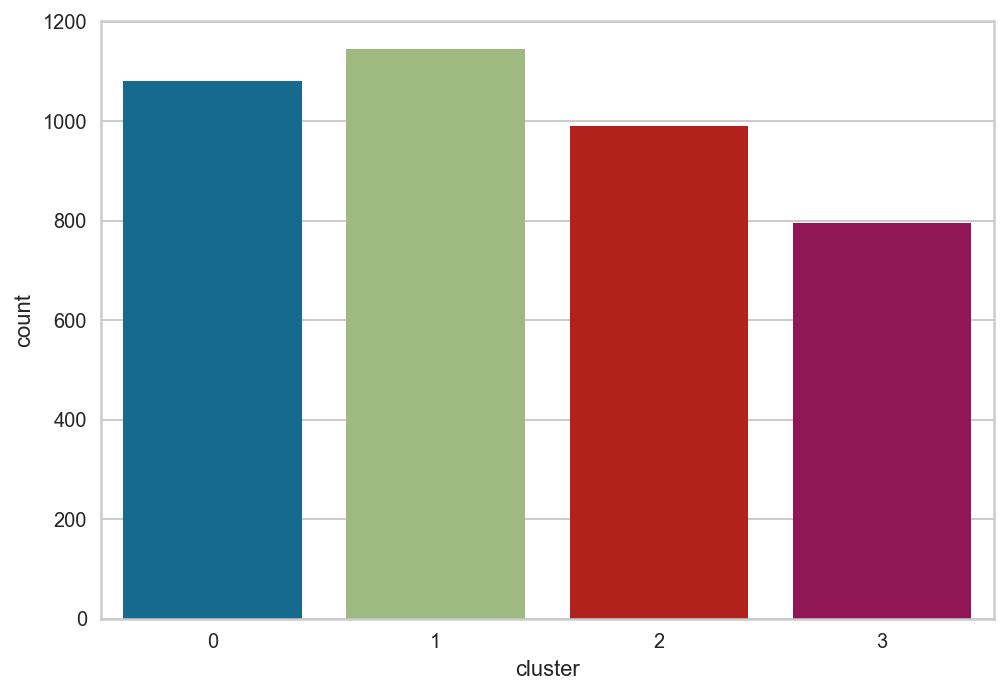

In [48]:
sb.countplot(data=dfc, x='cluster');

In [49]:
dfc.cluster.value_counts()

1    1145
0    1081
2    991 
3    795 
Name: cluster, dtype: int64

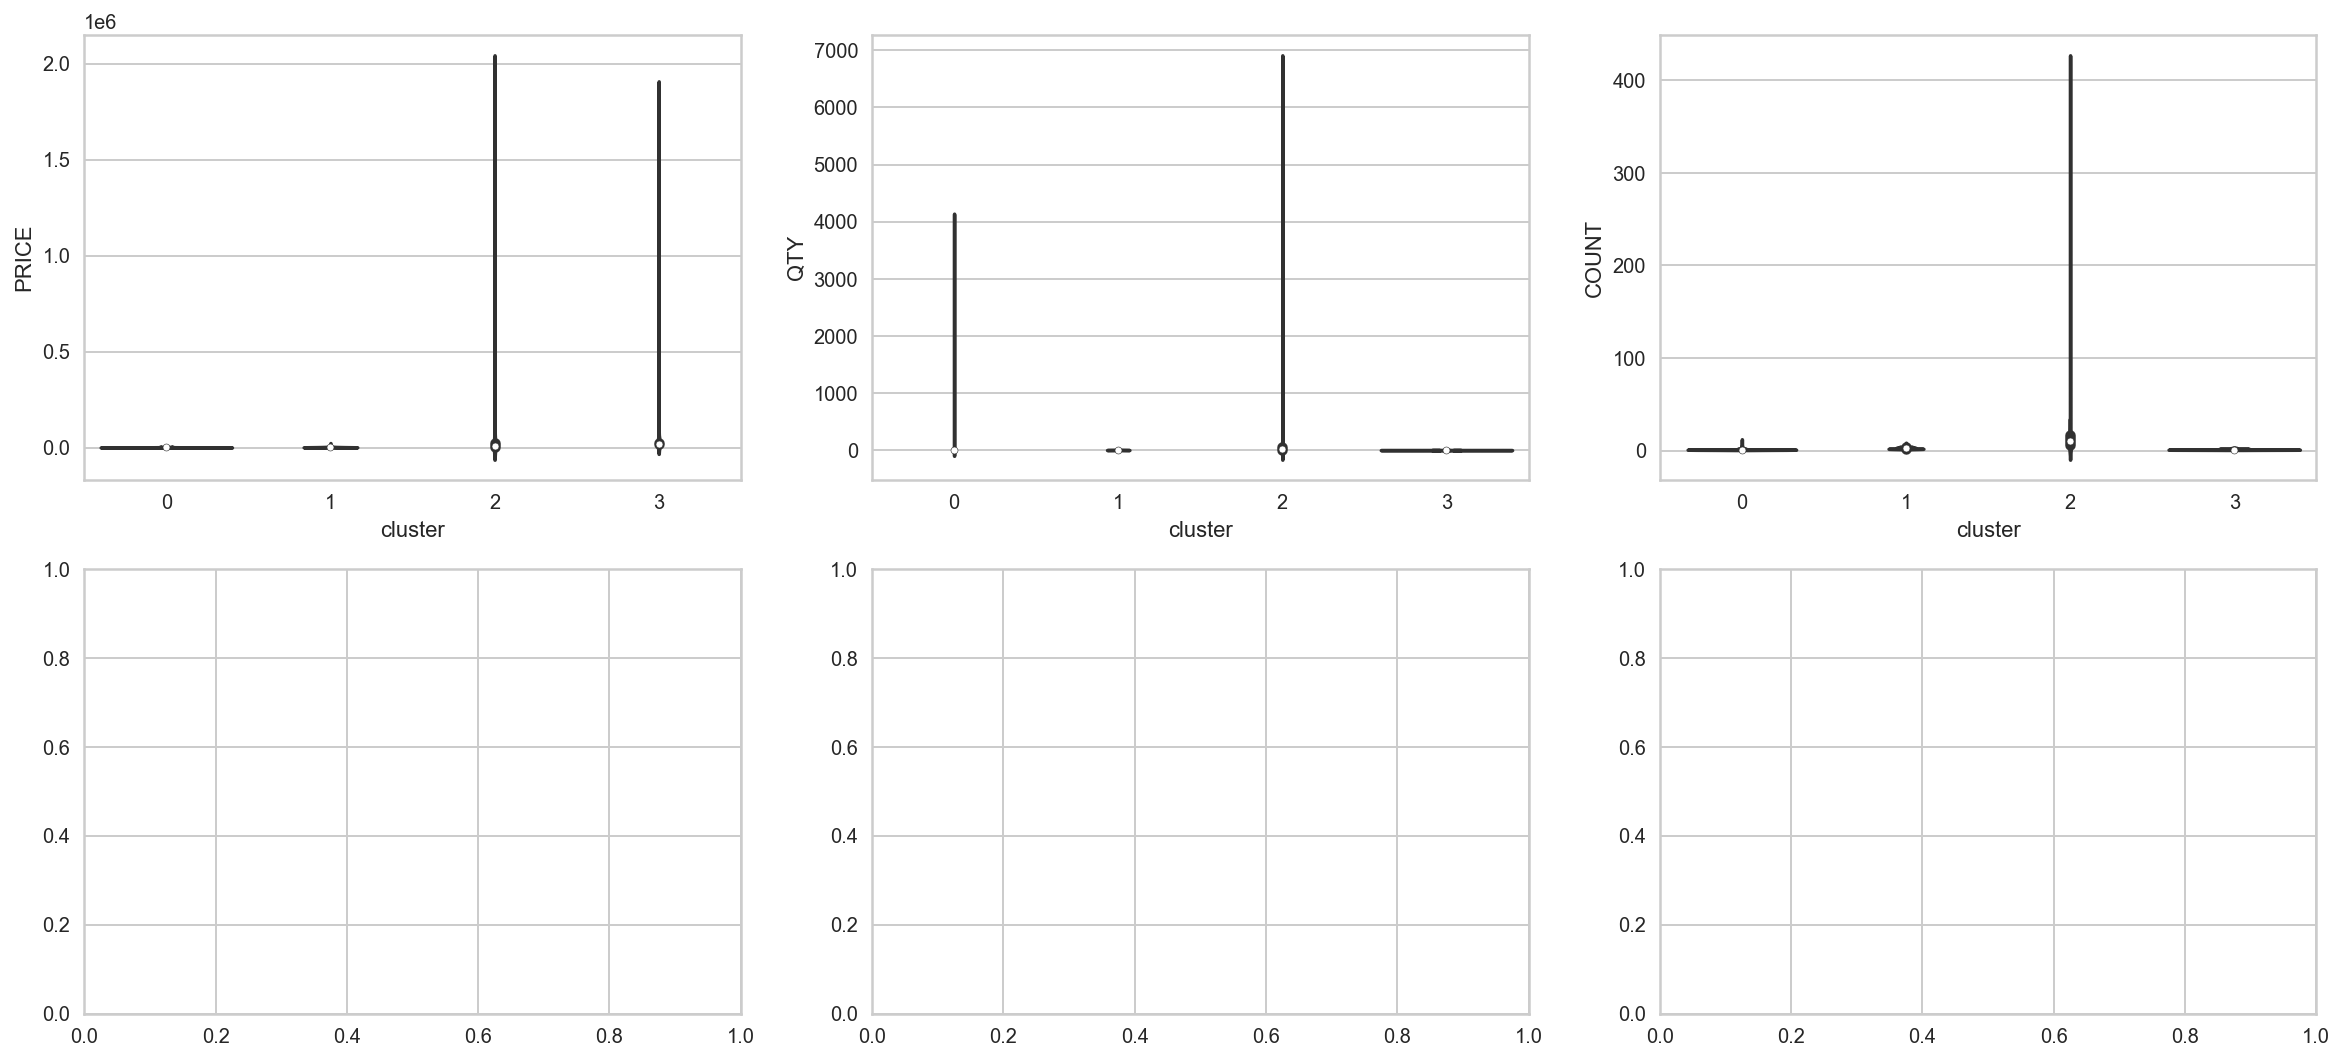

In [51]:
cols = ['PRICE', 'QTY', 'COUNT']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sb.violinplot(data=dfc, y=col, x='cluster', ax=ax[i])

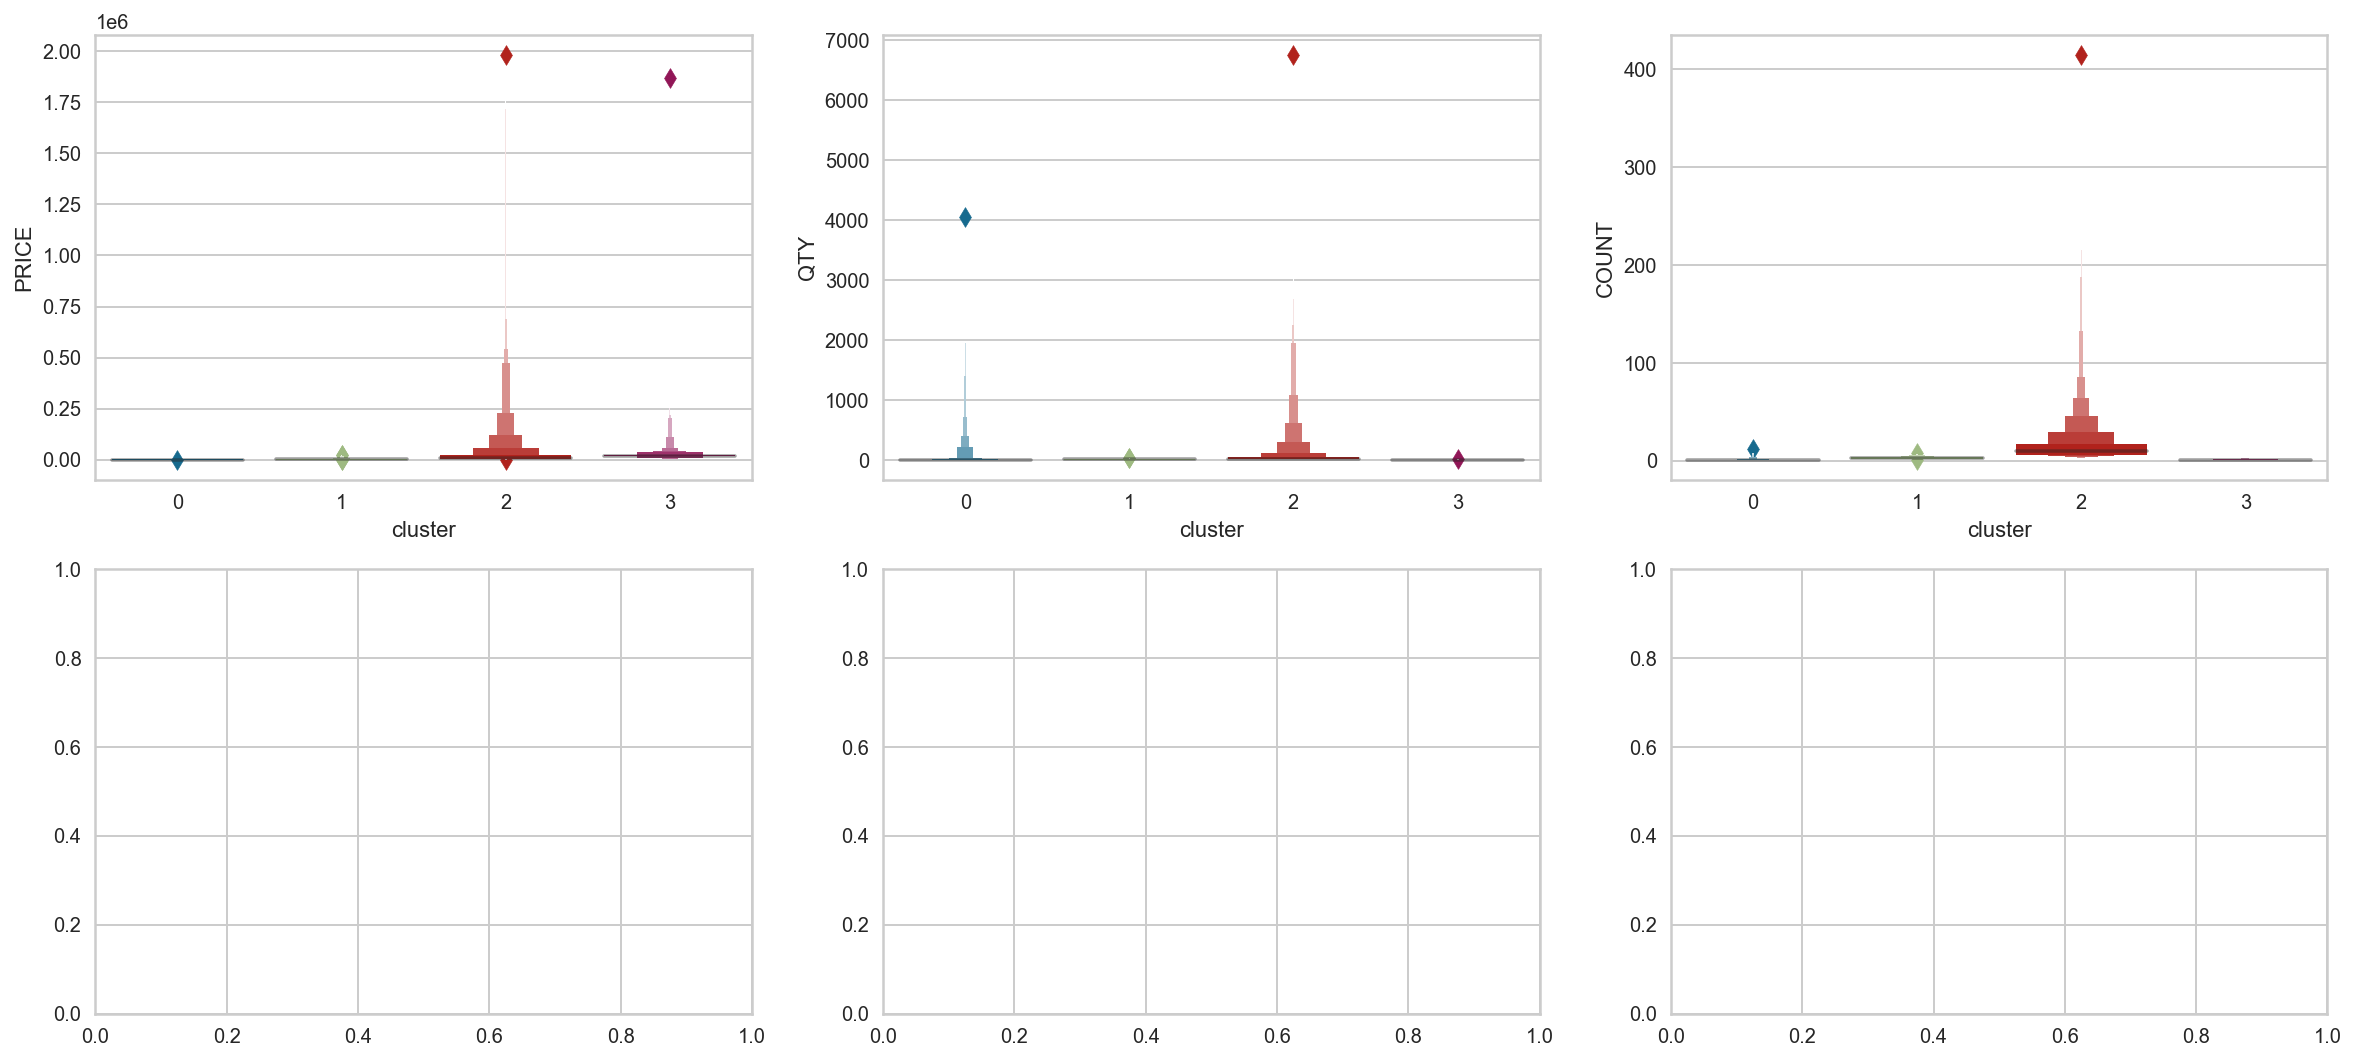

In [62]:
cols = ['PRICE', 'QTY', 'COUNT']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sb.boxenplot(data=dfc, y=col, x='cluster', ax=ax[i])

## **`Scale Data (eighter Z-Score, Power Transform)`**

In [52]:
dx = X
dx['cluster'] = model.labels_
dx.head()

,PRICE,QTY,COUNT,cluster
0,-0.895281,-1.145423,-1.047545,0
1,-0.378325,-1.145423,-1.047545,0
2,-0.613294,-0.080186,-0.094752,1
3,1.441789,1.950435,1.929663,2
4,1.777944,1.946045,1.848467,2


In [53]:
dx.groupby('cluster').median()

,PRICE,QTY,COUNT
cluster,,,
0,-0.988859,-1.145423,-1.047545
1,-0.453750,0.182546,0.400240
2,0.558267,1.241552,1.406229
3,1.060186,-1.145423,-1.047545


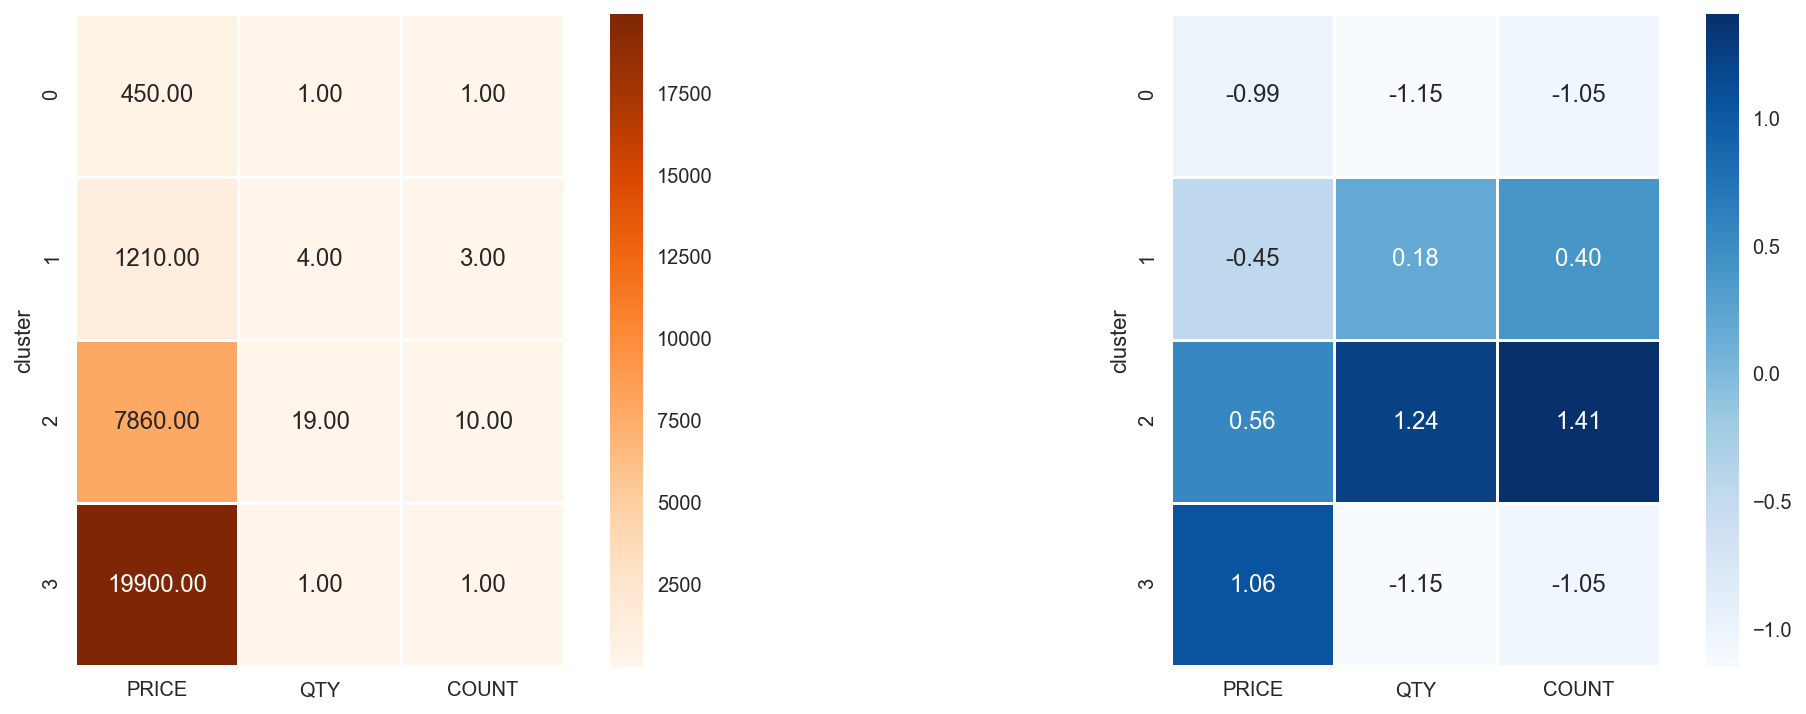

In [54]:
cols = ['PRICE', 'QTY', 'COUNT', 'cluster']
fig, ax = plt.subplots(ncols=2, figsize=(18, 6))
ax = ax.ravel()
sb.heatmap(dfc[cols].groupby('cluster').median(), cmap='Oranges', linewidths=1, square=True, annot=True, fmt='.2f', ax=ax[0]);
sb.heatmap(dx[cols].groupby('cluster').median(), cmap='Blues', linewidths=1, square=True, annot=True, fmt='.2f', ax=ax[1]);

In [55]:
dfc.groupby('cluster').head(3).sort_values('cluster')

,CUSTOMER,PRICE,QTY,COUNT,cluster
0,0088,535.0,1.0,1,0
1,0245,1391.0,1.0,1,0
6,A0021,470.0,13.0,2,0
2,1STOPBAKERY,901.0,3.0,2,1
8,A0047,950.0,7.0,3,1
11,A0076,350.0,3.0,2,1
3,A0005,40345.0,348.0,54,2
4,A0011,75219.3,333.0,34,2
5,A0012,60635.0,18.0,8,2
17,A0161,8900.0,1.0,1,3


# **`Conclusion`**
#### จากการวิเคราะห์ด้วย Silhouette Analysis พบว่า ค่า Silhouette Score ที่ได้มากที่สุดเป็นดังนี้

In [57]:
ss = sil_score(X, 2, 6)
print(f'ค่า Silhouette Score ที่ได้มากที่สุดคือ {max(ss)[0]} ที่จำนวนลูกค้ากลุ่มที่แบ่งได้คือ {max(ss)[1]} กลุ่ม')

ค่า Silhouette Score ที่ได้มากที่สุดคือ 0.5539 ที่จำนวนลูกค้ากลุ่มที่แบ่งได้คือ 5 กลุ่ม


#### โดยพิจารณาจากรูปกราฟที่ได้จากการทำ Silhouette Analysis เป็นดังรูป

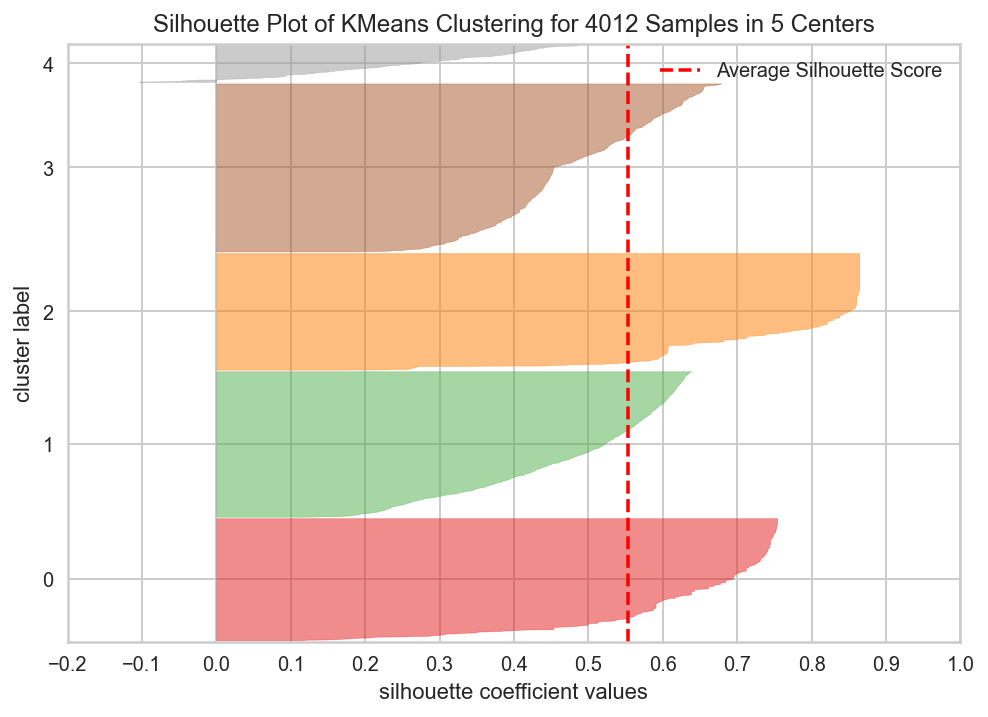

In [58]:
model = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(X)
visualizer.poof();

#### แต่เมื่อทำการวิเคราะห์ต่อด้วย Elbow Method ก็จะพบว่า ค่าที่เหมาะสมที่สุดคือจำนวนที่ 4 กลุ่ม
#### โดยดูที่จุดที่ 4 หมายเลข 5 จะมีเปอร์เซนต์ความเปลี่ยนแปลงอยู่ที่ 21.33 % หลังจากนั้น ค่าเปอร์เซนต์ที่ได้จะเปลี่ยนแปลงน้อยมาก ดังรูป

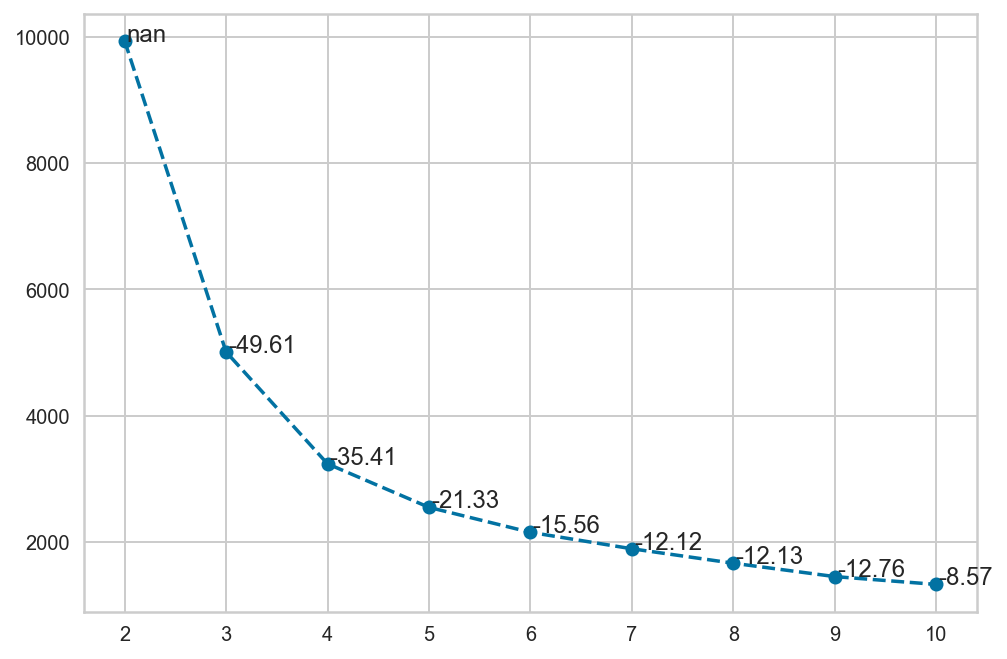

In [59]:
elbow_plot(X, 2, 10)

#### จำนวนลูกค้าที่ได้จากการแบ่งกลุ่ม จะได้เป็นสัดส่วนดังรูปกราฟ

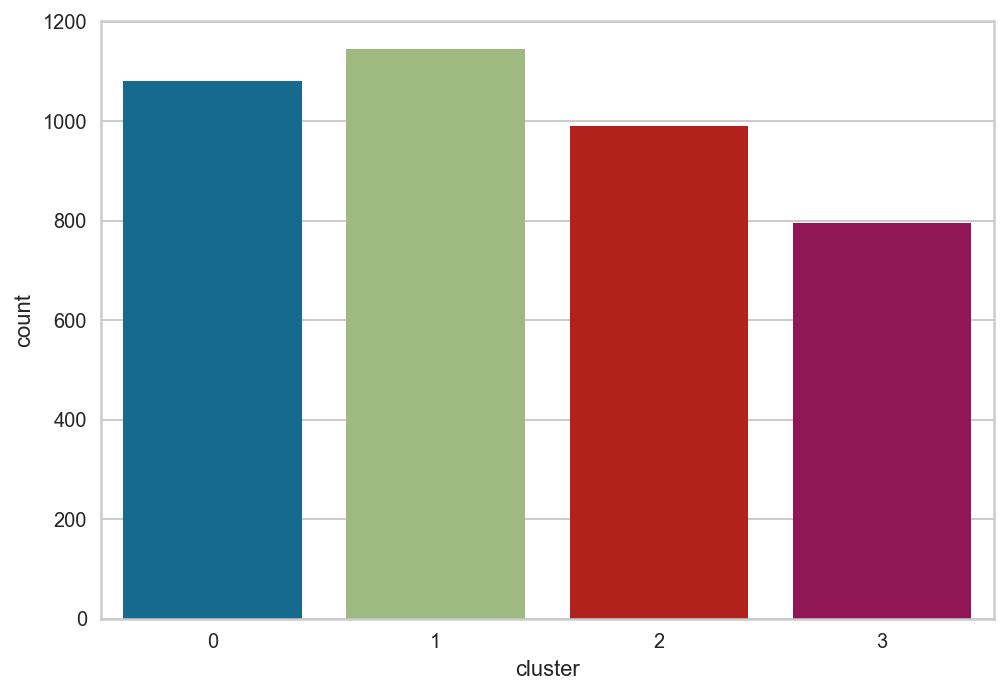

In [60]:
sb.countplot(data=dfc, x='cluster');

#### เมื่อสร้างรูปออกมาเป็นกราฟแบบ Heat Map จะเห็นได้อย่างชัดเจนถึงรายละเอียดในแต่ละกลุ่มดังรูป

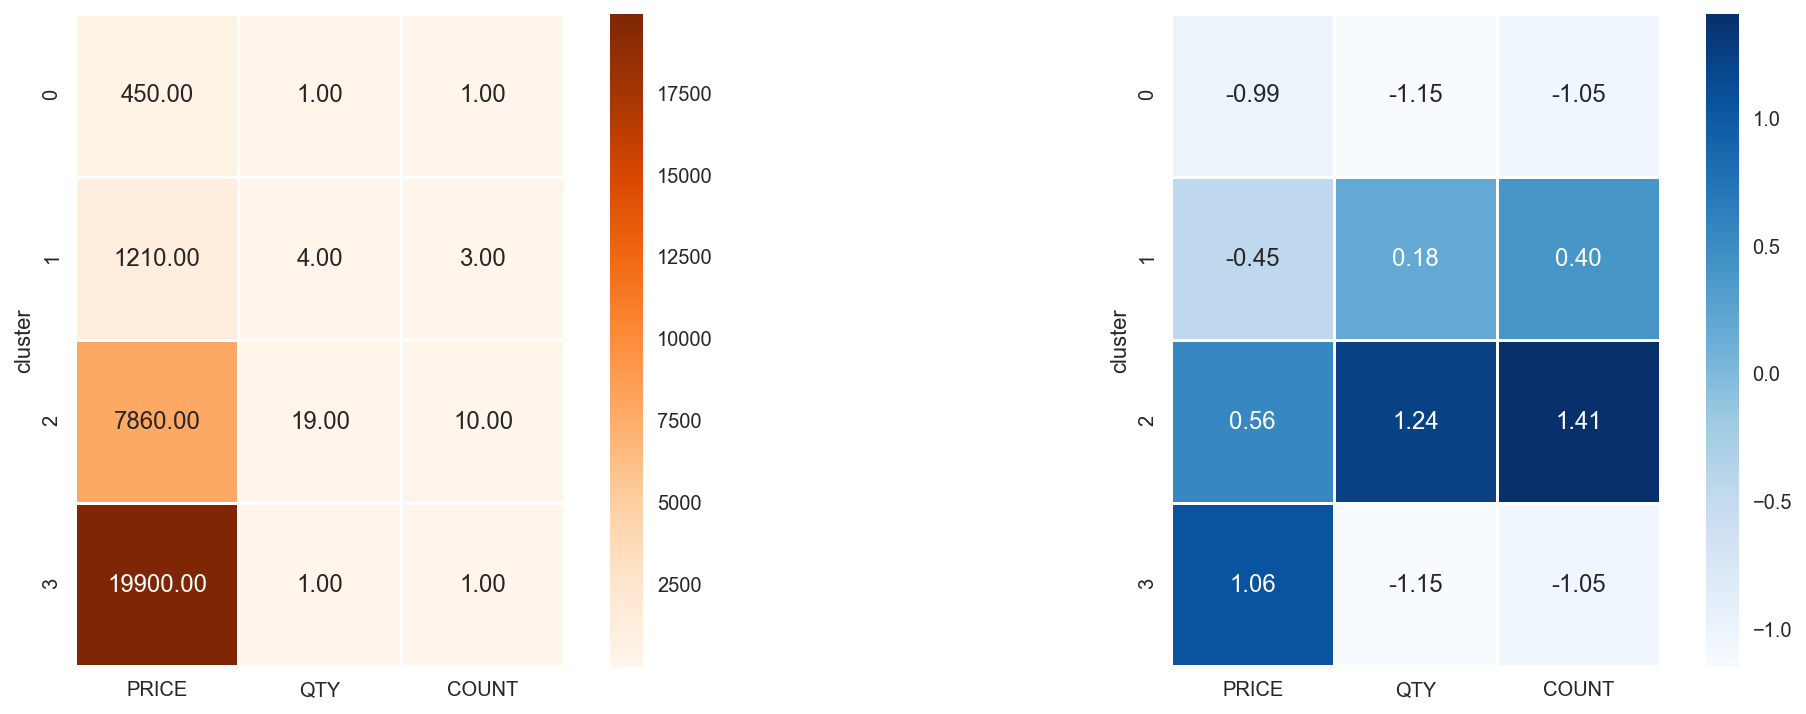

In [61]:
cols = ['PRICE', 'QTY', 'COUNT', 'cluster']
fig, ax = plt.subplots(ncols=2, figsize=(18, 6))
ax = ax.ravel()
sb.heatmap(dfc[cols].groupby('cluster').median(), cmap='Oranges', linewidths=1, square=True, annot=True, fmt='.2f', ax=ax[0]);
sb.heatmap(dx[cols].groupby('cluster').median(), cmap='Blues', linewidths=1, square=True, annot=True, fmt='.2f', ax=ax[1]);

#### เราจึงสรุปได้ว่า เราสามารถแบ่งกลุ่มลูกค้าออกได้ดังต่อไปนี้
* ลูกค้ากลุ่มที่ 1 ใช้ Clustering Number คือ 2 ลูกค้ากลุ่มนี้ ซื้อสินค้าในราคาสูง, ซื้อในปริมาณมาก และความถี่ในการซื้อบ่อยมาก
* ลูกค้ากลุ่มที่ 2 ใช้ Clustering Number คือ 0 ลูกค้ากลุ่มนี้ ซื้อสินค้าในราคาต่ำ, ซื้อในปริมาณน้อย และความถี่ในการซื้อน้อยมาก
* ลูกค้ากลุ่มที่ 3 ใช้ Clustering Number คือ 1 ลูกค้ากลุ่มนี้ ซื้อสินค้าในราคาปานกลาง, ซื้อในปริมาณปานกลาง และความถี่ในการซื้อปานกลาง
* ลูกค้ากลุ่มที่ 4 ใช้ Clustering Number คือ 3 ลูกค้ากลุ่มนี้ ซื้อสินค้าในราคาสูง, แต่ซื้อในปริมาณน้อย และความถี่ในการซื้อไม่บ่อยนัก